In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras

warnings.filterwarnings('ignore')

/home/luis/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
train_set.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [3]:
BATCH_SIZE = 256
NO_CLASSES = 10
EPOCHS = 5
IMAGE_HEIGHT, IMAGE_WIDTH = 28, 28

In [4]:
y_train = train_set['label'].values
X_train = train_set.drop('label', axis=1).values

X_test = test_set.values

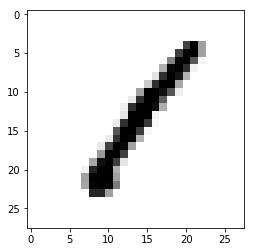

In [7]:
plt.figure()
plt.imshow(X_train[0].reshape((28, 28)), cmap='gray_r')

In [8]:
X_train = X_train.reshape(X_train.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH, 1)
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, 1)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(units=1024, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=NO_CLASSES, activation='softmax')
])

In [13]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              18875392  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

In [12]:
cnn.compile(optimizer=keras.optimizers.Adam(), 
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

In [14]:
history = cnn.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 182s 5ms/step - loss: 0.2126 - acc: 0.9321 - val_loss: 0.0594 - val_acc: 0.9823
Epoch 2/5
33600/33600 [==============================] - 187s 6ms/step - loss: 0.0552 - acc: 0.9834 - val_loss: 0.0417 - val_acc: 0.9863
Epoch 3/5
33600/33600 [==============================] - 187s 6ms/step - loss: 0.0329 - acc: 0.9893 - val_loss: 0.0432 - val_acc: 0.9886
Epoch 4/5
33600/33600 [==============================] - 185s 6ms/step - loss: 0.0234 - acc: 0.9919 - val_loss: 0.0380 - val_acc: 0.9895
Epoch 5/5
33600/33600 [==============================] - 196s 6ms/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0555 - val_acc: 0.9848


In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

In [17]:
plt.plot(range(1, EPOCHS+1), loss, label='loss')
plt.plot(range(1, EPOCHS+1), val_loss, label='val_loss')
plt.title('Train and validation loss')
plt.legend()

In [18]:
plt.plot(range(1, EPOCHS+1), acc, label='acc')
plt.plot(range(1, EPOCHS+1), val_acc, label='val_acc')
plt.title('Train and validation accuracy')
plt.legend()

In [19]:
cnn_final_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(units=1024, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=NO_CLASSES, activation='softmax')
])
cnn_final_model.compile(optimizer=keras.optimizers.Adam(), 
                        loss=keras.losses.sparse_categorical_crossentropy,
                        metrics=['accuracy'])

In [20]:
cnn_final_model.fit(X_train, y_train, epochs=EPOCHS-1, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/4
42000/42000 [==============================] - 209s 5ms/step - loss: 0.1861 - acc: 0.9419
Epoch 2/4
42000/42000 [==============================] - 212s 5ms/step - loss: 0.0466 - acc: 0.9855
Epoch 3/4
42000/42000 [==============================] - 210s 5ms/step - loss: 0.0308 - acc: 0.9904
Epoch 4/4
42000/42000 [==============================] - 214s 5ms/step - loss: 0.0191 - acc: 0.9939


In [21]:
import time
dir_ = 'cnn_checkpoint' + str(time.time()) + '.h5'
cnn_final_model.save(dir_)

In [22]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

ImageId  Label
0        1      0
1        2      0
2        3      0
3        4      0
4        5      0

In [23]:
y_pred = cnn_final_model.predict_classes(X_test)
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [24]:
submission['Label'] = y_pred
submission.head()

ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3

In [25]:
submission.to_csv('submission.csv', index=False)

Prediction: 0


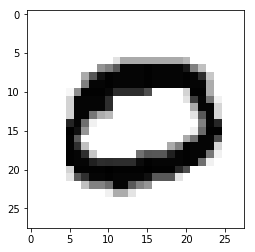

In [26]:
#Reviewing the test prediction
image_id = 1
plt.imshow(test_set.loc[image_id].values.reshape((28,28)), cmap='gray_r')
print('Prediction: ' + str(y_pred[image_id]))